In [16]:
import pandas as pd
import numpy as np 
import sklearn.svm as svm

In [17]:
# Read the data
import glob,os
path=r'../Dataset/'
file=glob.glob(os.path.join(path, "data*.csv"))
print(file)
dl= []
for f in file:
   dl.append(pd.read_csv(f,header=[0],index_col=None))
df=pd.concat(dl)

['../Dataset\\data1.csv', '../Dataset\\data10.csv', '../Dataset\\data11.csv', '../Dataset\\data12.csv', '../Dataset\\data13.csv', '../Dataset\\data14.csv', '../Dataset\\data15.csv', '../Dataset\\data2.csv', '../Dataset\\data3.csv', '../Dataset\\data4.csv', '../Dataset\\data5.csv', '../Dataset\\data6.csv', '../Dataset\\data7.csv', '../Dataset\\data8.csv', '../Dataset\\data9.csv']


In [18]:
# nan_rows = df[df.isnull().T.any().T]
# nan_rows = df[np.isfinite(df).T.any().T]
# nan_rows

In [19]:
# label Encoding
df['marker'] = df['marker'].replace(['Natural'],0)
df['marker'] = df['marker'].replace(['Attack'],1)
df['marker'].value_counts()

1    55663
0    22714
Name: marker, dtype: int64

In [20]:
# Separate target from predictors
y = df.marker
x = df.drop(['marker'], axis=1)

In [21]:
values = x
# np.all(np.isfinite(values))
values.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
np.all(np.isnan(values))

False

In [23]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized=scaler.fit_transform(values)
X_normalized

array([[ 0.85453088, -0.36168098, -0.46309618, ..., -0.00714409,
        -0.00945092, -0.0087498 ],
       [ 0.88713303, -0.05655571, -0.43381824, ..., -0.00714409,
        -0.00945092, -0.0087498 ],
       [ 0.88758741, -0.05362181, -0.43340804, ..., -0.00714409,
        -0.00945092, -0.0087498 ],
       ...,
       [-0.42853971,  0.037329  , -1.62139511, ..., -0.00714409,
        -0.00945092, -0.0087498 ],
       [-0.4289941 ,  0.04026289, -1.6218053 , ..., -0.00714409,
        -0.00945092, -0.0087498 ],
       [-0.43024366,  0.04613069, -1.62288208, ..., -0.00714409,
        -0.00945092, -0.0087498 ]])

In [62]:
from sklearn.model_selection import train_test_split
# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_normalized, y, train_size=0.2, test_size=0.1,
                                                                random_state=0)

In [63]:
# nan_rows = df[df.isnull().T.any().T]
# nan_rows
# X_train_full = X_train_full[~pd.isnan(X_train_full)]

In [64]:
X_train = pd.DataFrame(X_train_full)
print(X_train.isnull().any())
print(np.isnan(X_train).any())
print(np.isinf(X_train).all())


0      False
1      False
2      False
3      False
4      False
       ...  
123    False
124    False
125    False
126    False
127    False
Length: 128, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
123    False
124    False
125    False
126    False
127    False
Length: 128, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
123    False
124    False
125    False
126    False
127    False
Length: 128, dtype: bool


In [65]:
# #缺失值处理，以下两种方式均可
# #删除包含缺失值的行
# train.dropna(inplace=True)
# #缺失值填充
# train.fillna('100')

# #数据处理
# train_inf = np.isinf(train)
# train[train_inf] = 0

In [66]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train_full))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid_full))

In [67]:
import sklearn.metrics as sm

In [68]:
print(len(imputed_X_train))

15675


In [69]:
import time
time_start=time.time()
clf=svm.SVC(kernel = 'sigmoid', C = 10)
clf.fit(imputed_X_train,y_train)
time_end=time.time()
print('totally cost',time_end-time_start)
pred_test_y = clf.predict(imputed_X_valid)
cr = sm.classification_report(y_valid, pred_test_y)
print(cr)

totally cost 18.477152585983276
              precision    recall  f1-score   support

           0       0.32      0.32      0.32      2250
           1       0.72      0.72      0.72      5588

    accuracy                           0.60      7838
   macro avg       0.52      0.52      0.52      7838
weighted avg       0.61      0.60      0.61      7838



70539 1200.5537838935852
54863 285.8661916255951
39188 139.07190251350403
15675 18.477152585983276

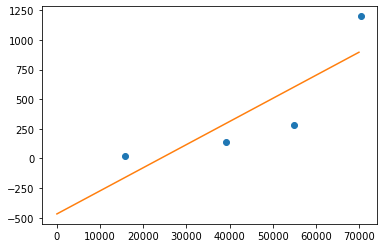

In [70]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
x = [[15675], [39188], [54863], [70538]]
y = [[18], [139], [285], [1200]]
reg = LinearRegression().fit(x,y)
x_pre = np.linspace(0,70000,5)
x_pre = x_pre.reshape(-1,1)
y_pre = reg.predict(x_pre)
plt.plot(x, y,'o')
plt.plot(x_pre, y_pre)
plt.show()

In [71]:
a = reg.coef_
b = reg.intercept_
print(a,b)

[[0.01948195]] [-467.47361964]


In [30]:
pred_test_y = clf.predict(imputed_X_valid)
cr = sm.classification_report(y_valid, pred_test_y)

In [31]:
print(cr)

In [32]:
ac = sm.accuracy_score(y_valid, pred_test_y)
ac

In [35]:
import time
time_start=time.time()
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
time_end=time.time()
print('totally cost',time_end-time_start)
clf = clf.fit(imputed_X_train, y_train)
pred_test_y = clf.predict(imputed_X_valid)
cr = sm.classification_report(y_valid, pred_test_y)

print(cr)

totally cost 0.000965118408203125
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2250
           1       0.93      0.95      0.94      5588

    accuracy                           0.91      7838
   macro avg       0.90      0.88      0.89      7838
weighted avg       0.91      0.91      0.91      7838



In [ ]:
ac = sm.accuracy_score(y_valid, pred_test_y)
ac

In [ ]:
imputed_X_train
print(np.any(imputed_X_train.isnull()))

In [ ]:
X_train_full

In [ ]:
import wittgenstein as lw

clf = lw.RIPPER()
clf.fit(x, y)
clf

In [ ]:
clf.out_model()

In [ ]:
clf.score(X_valid_full,y_valid)

In [ ]:
pred_test_y = clf.predict(X_valid_full)

cr = sm.classification_report(y_valid, pred_test_y)
print(cr)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(imputed_X_train,y_train)
pred_test_y = neigh.predict(imputed_X_valid)
cr = sm.classification_report(y_valid, pred_test_y)
print(cr)